# Fraud Detection

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Description of the dataset
1) Time: Number of seconds elapsed between this transaction and the first transaction in the dataset

2) V1-V28: Result of a PCA Dimensionality reduction to protect user identities and sensitive features

### Questions:

a)	Apply Any classification of your choice (KNN, Naïve Bayes, SVM, Random Forest, …) and report the performance

b)	Visualize the number of samples per class (This is a binary classification, 0: Non-Fraud and 1: Fraud) and report your observation

c)	This dataset is unbalanced meaning we don’t have equal number of samples per class. Consequently, we need specific techniques when dealing with unbalanced dataset. Please study one of the techniques or challenges we face while working on unbalanced dataset and discuss it shortly.



In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
# load dataset
df = pd.read_csv('../creditcard.csv')
df.head(3)


Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  

[3 rows x 31 columns]

In [33]:
# To check the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [34]:
# To check is any NaN value in the dataset
df.isna().sum().value_counts()

0    31
dtype: int64

In [35]:
# Column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
# We will use the V1-V28 as the features and dropping the Time and Amount
# Prepare the features and target
X = df.drop(['Time','Amount', 'Class'], axis=1)
y = df['Class']
print(f"Dimension of the feature-X {X.shape}\nDimension of the target -y{y.shape}")

Dimension of the feature-X (284807, 28)
Dimension of the target -y(284807,)


In [37]:
# to have the statistics about dataset
X.describe().T

count          mean       std         min       25%       50%  \
V1   284807.0  3.919560e-15  1.958696  -56.407510 -0.920373  0.018109   
V2   284807.0  5.688174e-16  1.651309  -72.715728 -0.598550  0.065486   
V3   284807.0 -8.769071e-15  1.516255  -48.325589 -0.890365  0.179846   
V4   284807.0  2.782312e-15  1.415869   -5.683171 -0.848640 -0.019847   
V5   284807.0 -1.552563e-15  1.380247 -113.743307 -0.691597 -0.054336   
V6   284807.0  2.010663e-15  1.332271  -26.160506 -0.768296 -0.274187   
V7   284807.0 -1.694249e-15  1.237094  -43.557242 -0.554076  0.040103   
V8   284807.0 -1.927028e-16  1.194353  -73.216718 -0.208630  0.022358   
V9   284807.0 -3.137024e-15  1.098632  -13.434066 -0.643098 -0.051429   
V10  284807.0  1.768627e-15  1.088850  -24.588262 -0.535426 -0.092917   
V11  284807.0  9.170318e-16  1.020713   -4.797473 -0.762494 -0.032757   
V12  284807.0 -1.810658e-15  0.999201  -18.683715 -0.405571  0.140033   
V13  284807.0  1.693438e-15  0.995274   -5.791881 -0.648539 -0.013568   
V14  284807.0  1.479045e-15  0.958596  -19.214325 -0.425574  0.050601   
V15  284807.0  3.482336e-15  0.915316   -4.498945 -0.582884  0.048072   
V16  284807.0  1.392007e-15  0.876253  -14.129855 -0.468037  0.066413   
V17  284807.0 -7.528491e-16  0.849337  -25.162799 -0.483748 -0.065676   
V18  284807.0  4.328772e-16  0.838176   -9.498746 -0.498850 -0.003636   
V19  284807.0  9.049732e-16  0.814041   -7.213527 -0.456299  0.003735   
V20  284807.0  5.085503e-16  0.770925  -54.497720 -0.211721 -0.062481   
V21  284807.0  1.537294e-16  0.734524  -34.830382 -0.228395 -0.029450   
V22  284807.0  7.959909e-16  0.725702  -10.933144 -0.542350  0.006782   
V23  284807.0  5.367590e-16  0.624460  -44.807735 -0.161846 -0.011193   
V24  284807.0  4.458112e-15  0.605647   -2.836627 -0.354586  0.040976   
V25  284807.0  1.453003e-15  0.521278  -10.295397 -0.317145  0.016594   
V26  284807.0  1.699104e-15  0.482227   -2.604551 -0.326984 -0.052139   
V27  284807.0 -3.660161e-16  0.403632  -22.565679 -0.070840  0.001342   
V28  284807.0 -1.206049e-16  0.330083  -15.430084 -0.052960  0.011244   

          75%         max  
V1   1.315642    2.454930  
V2   0.803724   22.057729  
V3   1.027196    9.382558  
V4   0.743341   16.875344  
V5   0.611926   34.801666  
V6   0.398565   73.301626  
V7   0.570436  120.589494  
V8   0.327346   20.007208  
V9   0.597139   15.594995  
V10  0.453923   23.745136  
V11  0.739593   12.018913  
V12  0.618238    7.848392  
V13  0.662505    7.126883  
V14  0.493150   10.526766  
V15  0.648821    8.877742  
V16  0.523296   17.315112  
V17  0.399675    9.253526  
V18  0.500807    5.041069  
V19  0.458949    5.591971  
V20  0.133041   39.420904  
V21  0.186377   27.202839  
V22  0.528554   10.503090  
V23  0.147642   22.528412  
V24  0.439527    4.584549  
V25  0.350716    7.519589  
V26  0.240952    3.517346  
V27  0.091045   31.612198  
V28  0.078280   33.847808

## Modelling

### a)	Apply Any classification of your choice (KNN, Naïve Bayes, SVM, Random Forest, Logistic Regression…) and report the performance

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((199364, 28), (85443, 28), (199364,), (85443,))

In [40]:
# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

# Print the classifcation report and confusion matrix
print('\nClassification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)




Accuracy: 99.93%

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.88      0.62      0.73       136

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85295    12]
 [   51    85]]


## Note:

The choice of the metric used in unbalanced datasets is extremely important. Using simpler metrics like accuracy_score or accrucacy can be misleading in this question. 

In a dataset with highly unbalanced classes like this, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate, which does not reflect the truth.

The right way to evaluate the results is by means of a confusion matrix, which shows the correct and incorrect predictions for each class. 

As we see from the confusion matrix, there seems to be 12 False Positive (these cases are reported as fraud while they are not). That is why FP affects the precision for the fraud cases. On the other hand, there are 51 False Negative cases (these cases are reported as nonfarud while ther are fraud in real life). 

False Positive and False Negative cases are important for a business. 

Because, 51 False Negative (real fraud cases are reported as nonfraud) cases make the business loose money, that is why it is critical for the business. While the 12 False Positive (real nonfraud cases are reported as fraud) cases may not seem so important, however these cases may also cause company loose its customers in the long term.



### b)	Visualize the number of samples per class (This is a binary classification, 0: Non-Fraud and 1: Fraud) and report your observation

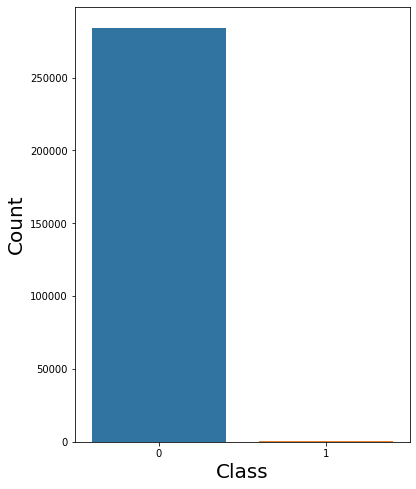

In [10]:
plt.figure(figsize=(6,8))
sns.countplot('Class', data = df)
plt.xlabel("Class", fontsize = 20)
plt.ylabel("Count", fontsize = 20);

In [11]:
# non-fraud and fraud cases
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [12]:
#Ratio of nanfraud and fraud to the overall cases
print(f"Ratio of nonfraud cases : {y.value_counts()[0]/y.value_counts().sum()}")
print(f"Ratio of fraud cases    : {y.value_counts()[1]/y.value_counts().sum()}")

Ratio of nonfraud cases : 0.9982725143693799
Ratio of fraud cases    : 0.001727485630620034


In [13]:
# Define a function to create a scatter plot of our data and labels
def plot_data(X: np.ndarray, y: np.ndarray):
    plt.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5, linewidth=0.15)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5, linewidth=0.15, c='r')
    plt.legend()
    return plt.show()

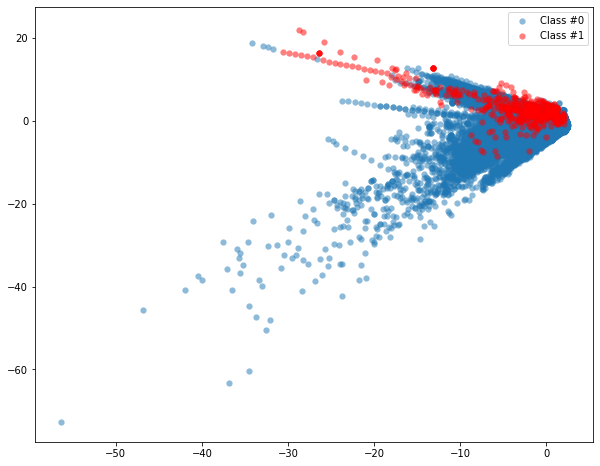

In [14]:
plt.figure(figsize=(10,8))
plot_data(np.array(X), np.array(y))

### c)	This dataset is unbalanced meaning we don’t have equal number of samples per class. Consequently, we need specific techniques when dealing with unbalanced dataset. Please study one of the techniques or challenges we face while working on unbalanced dataset and discuss it shortly.

### Note:

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. There are 2 common methods used for resampling. The methods are:
    * under-sampling (removing samples from the majority class) 
    * over-sampling  (adding more examples from the minority class)

We will apply some of these resampling techniques, using the Python library imbalanced-learn such as Synthetic Minority Oversampling Technique - SMOTE, RandomUnderSampler, RandonUnderSampler
    


#### Let's use the Synthetic Minority Oversampling Technique - SMOTE 

In [15]:
from imblearn.over_sampling import SMOTE
method = SMOTE()
X_resampled, y_resampled = method.fit_sample(X_train, y_train)
#X_resampled, y_resampled = method.fit_sample(X, y) ## this is wrong approach
X_resampled.shape, y_resampled.shape,X_test.shape,y_test.shape

((398016, 28), (398016,), (85443, 28), (85443,))

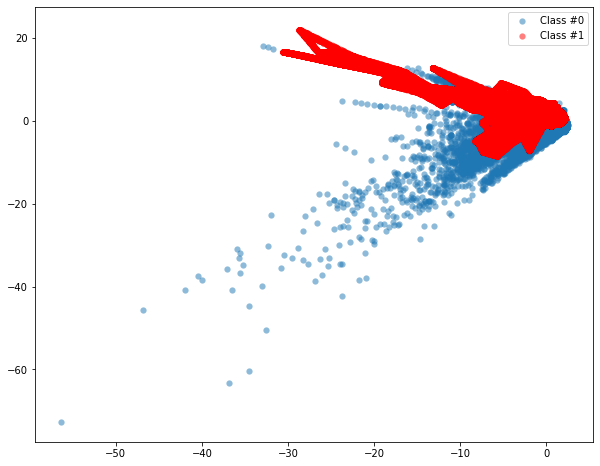

In [16]:
plt.figure(figsize=(10,8))
plot_data(np.array(X_resampled), np.array(y_resampled))

In [17]:
def plt_count(data_series):
    plt.figure(figsize=(6,8))
    sns.countplot('Class', data = data_series.to_frame('Class'))
    plt.xlabel("Class", fontsize = 20)
    plt.ylabel("Count", fontsize = 20)
#     plt.legend()
    return plt.show()


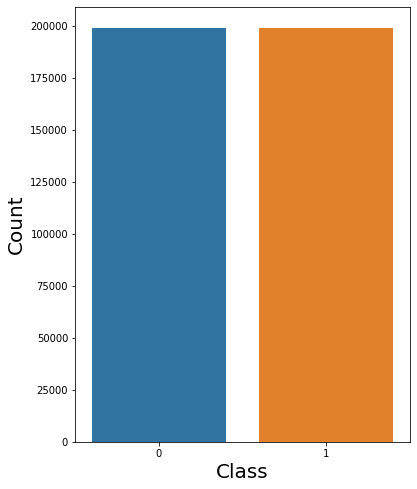

In [18]:
plt_count(y_resampled)

In [19]:
# Fit a logistic regression model to our data
# model = LogisticRegression()
model.fit(X_resampled, y_resampled)

predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

# Print the classifcation report and confusion matrix
print('\nClassification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)



Accuracy: 97.34%

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83042  2265]
 [   10   126]]


### Note:
The accuracy seems to be more realistic with the balanced data now.

As we see from the confusion matrix; 

   The False Positive increase while False Negative cases decreases sharply.

Decreasing the FN case seems to be good in terms of business. As we all know there is a trade-off between precision and recall. That is way while one of them decreases, the other one increases.
   

#### Let's use Oversampling 

In [20]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape,X_test.shape,y_test.shape

((398016, 28), (398016,), (85443, 28), (85443,))

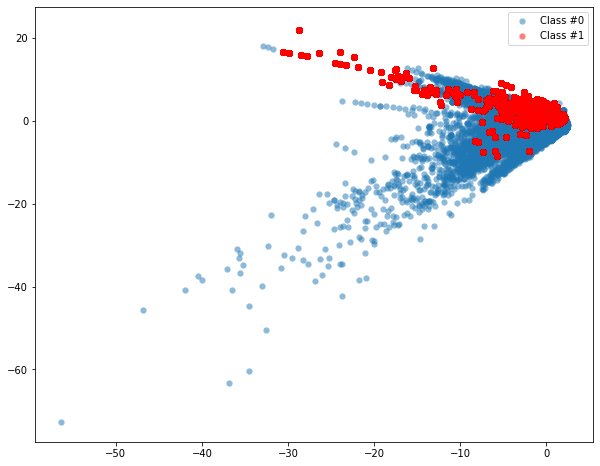

In [21]:
plt.figure(figsize=(10,8))
plot_data(np.array(X_resampled), np.array(y_resampled))

In [22]:
print(X_resampled.shape)
Xresampled_new = X_resampled.drop_duplicates()
print(Xresampled_new.shape)


(398016, 28)
(194190, 28)


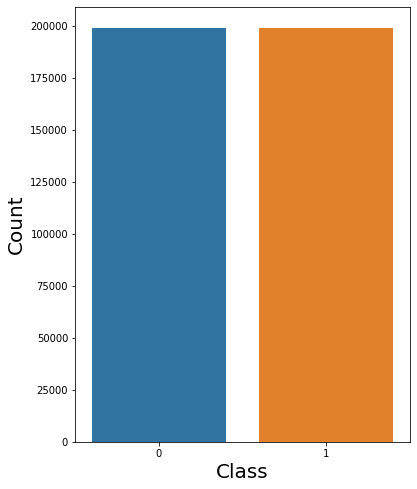

In [23]:
plt_count(y_resampled)

In [24]:
model.fit(X_resampled, y_resampled)

predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

# Print the classifcation report and confusion matrix
print('\nClassification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)


Accuracy: 97.40%

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85307
           1       0.05      0.93      0.10       136

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.99     85443

Confusion matrix:
 [[83098  2209]
 [   10   126]]


### Note:
    
The accuracy seems to be more realistic with the balanced data now, just like the previous solution with SMOTE.

The difference between the SMOTE and RandomOverSampler methods is that the latter one is a kind of bootstrapping, uses random sampling with replacement while the former one uses interpolation with nearest neighbourhood for sampling.

As we see from the confusion matrix;

The False Positive increase while False Negative cases decreases sharply.

Decreasing the FN case seems to be good in terms of business. As we all know there is a trade-off between precision and recall. That is way while one of them decreases, the other one increases.

#### Let's use Undersampling 

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)
X_resampled.shape, y_resampled.shape,X_test.shape,y_test.shape

((712, 28), (712,), (85443, 28), (85443,))

In [26]:
y_resampled.value_counts()

1    356
0    356
Name: Class, dtype: int64

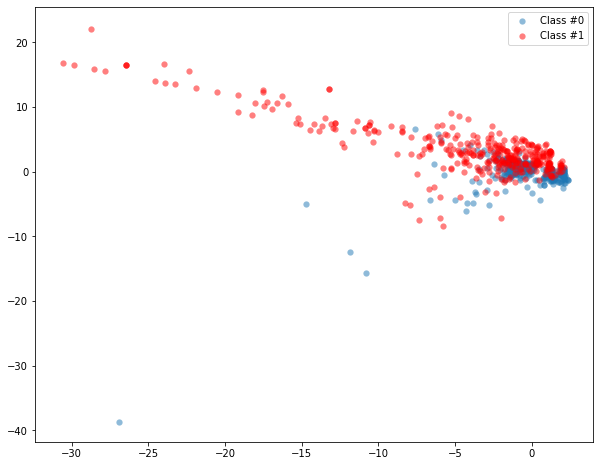

In [27]:
plt.figure(figsize=(10,8))
plot_data(np.array(X_resampled), np.array(y_resampled))

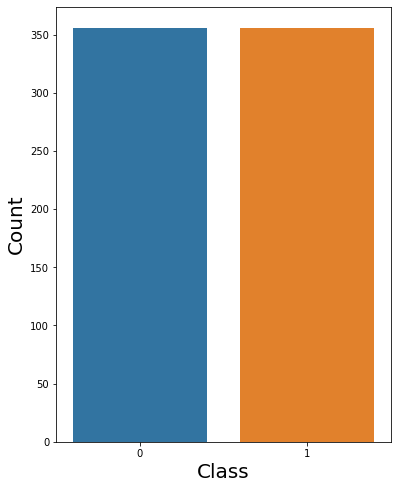

In [28]:
plt_count(y_resampled)

In [29]:
model.fit(X_resampled, y_resampled)

predicted = model.predict(X_test)

accuracy = accuracy_score(y_test, predicted)
print("\nAccuracy: %.2f%%" % (accuracy * 100.0))

# Print the classifcation report and confusion matrix
print('\nClassification report:\n', classification_report(y_test, predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=predicted)
print('Confusion matrix:\n', conf_mat)


Accuracy: 96.58%

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85307
           1       0.04      0.93      0.08       136

    accuracy                           0.97     85443
   macro avg       0.52      0.95      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix:
 [[82390  2917]
 [    9   127]]


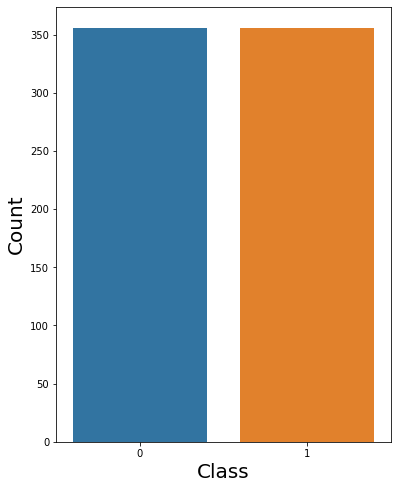

In [30]:
plt_count(y_resampled)

### Note:
    
Even though this method gives similar results with previous one. This method is not preferred because it throws real observations away.
